<a href="https://colab.research.google.com/github/portex33/MScASDF/blob/main/Scenario1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Generation


**Generate synthetic data to work on.**

This code generates random values that follow a normal districution.  The output is written to a csv file.



In [ ]:
from random import seed
from random import randint
import datetime
import numpy
from numpy import random

# data is deterministic based on seed
seed(6)

#check if file exists and delete it
import os
if os.path.exists("data1.csv"):
  os.remove("data1.csv")
  print("file removed")
else:
  print("The file does not exist")

#write headings
f = open("data1.csv", "a")
f.write("week,userid,views\n")

#Write data for 12 weeks and 100 users.

viewsarr = numpy.random.normal(loc=85, scale=8, size=1300).astype(int)
viewcount = 0
for weeks in range(12):
    for users in range(100):
        views = viewsarr[viewcount]
        fanny = (users + 1) * (weeks + 1)
        
        f = open("data1.csv", "a")
        #convert week number to date
        d = "2021-W" + str(weeks+1)
        r = datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")
        print (str(viewcount) + "   " + str(views))
        f.write(str(r) + ", " + str(users) + ", " + str(views) + "\n")
        #print(str(r) + ", " + str(users) + ", " + str(views))
        viewcount = viewcount+1
f = open("data1.csv", "a")
#f.write(str("2021-03-22 00:00:00") + ", " + str(99) + ", " + str(viewsarr[1199]) + "\n")

file removed
0   71
1   95
2   75
3   82
4   83
5   93
6   86
7   89
8   93
9   77
10   83
11   84
12   77
13   93
14   84
15   92
16   84
17   87
18   84
19   83
20   97
21   85
22   88
23   88
24   92
25   90
26   100
27   97
28   89
29   84
30   84
31   91
32   86
33   92
34   92
35   94
36   71
37   92
38   89
39   85
40   91
41   88
42   84
43   86
44   98
45   87
46   91
47   86
48   89
49   90
50   90
51   73
52   81
53   75
54   88
55   89
56   83
57   80
58   97
59   89
60   84
61   80
62   79
63   77
64   100
65   91
66   85
67   85
68   87
69   95
70   89
71   79
72   80
73   83
74   75
75   91
76   82
77   100
78   89
79   96
80   73
81   92
82   77
83   99
84   80
85   86
86   93
87   93
88   94
89   85
90   79
91   95
92   84
93   82
94   94
95   85
96   77
97   71
98   89
99   78
100   78
101   76
102   89
103   86
104   86
105   82
106   85
107   91
108   78
109   85
110   81
111   92
112   87
113   92
114   82
115   69
116   87
117   90
118   91
119   84
120   85
121  

# Visualise the Data

**Import and setup graphing libraries**

In [90]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import plotly.express as px
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False


**Read the file and display dataframe**

In [91]:

df = pd.read_csv('data1.csv')

df


,week,userid,views
0,2021-01-04 00:00:00,0,74
1,2021-01-04 00:00:00,1,82
2,2021-01-04 00:00:00,2,75
3,2021-01-04 00:00:00,3,86
4,2021-01-04 00:00:00,4,97
...,...,...,...
1195,2021-03-22 00:00:00,95,90
1196,2021-03-22 00:00:00,96,93
1197,2021-03-22 00:00:00,97,82
1198,2021-03-22 00:00:00,98,88


In [92]:
df['week'] = pd.to_datetime(df['week'])

**Generate plot of the data - views by weeks**

In [93]:
df.columns.values
df = df.rename(columns={' views': 'views'}) 

x = df.week
y = df.views
#df.plot.bar (x='week', y='views')


fig = px.scatter(df.reset_index(), x='week', y='views', title='Agent Weekly Customer Views')
fig.show()

**Seed the data with some potential anomalies and regraph**

In [94]:
df.loc[999, 'views'] = 125
df.loc[777, 'views'] = 115




fig = px.scatter(df.reset_index(), x='week', y='views', title='Agent Weekly Customer Views')
fig.show()

# Prophet Anomaly Detection

In [95]:
from fbprophet import Prophet

#Rename columns as Prophet expects columns to be named ds (timestamp) and y (data).
model_df = df.reset_index()[['week', 'views']].rename({'week':'ds', 
                                                           'views':'y'}, 
                                                          axis='columns')



In [96]:
#train with first 1000 items
train = model_df[0:599]

#test with last 200
test = model_df[600:2000]

In [97]:
print(train.shape)

(599, 2)


In [98]:
model = Prophet(weekly_seasonality=True)
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [99]:
test

,ds,y
600,2021-02-15,81
601,2021-02-15,91
602,2021-02-15,80
603,2021-02-15,79
604,2021-02-15,82
...,...,...
1195,2021-03-22,90
1196,2021-03-22,93
1197,2021-03-22,82
1198,2021-03-22,88


In [100]:
future = model.make_future_dataframe(periods=6, freq='W-MON')
forecast = model.predict(future)

In [101]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-04,76.592917,74.404193,94.078233,76.592917,76.592917,7.842362,7.842362,7.842362,7.842362,7.842362,7.842362,0.0,0.0,0.0,84.435279
1,2021-01-11,76.659005,75.191166,95.231371,76.659005,76.659005,7.842362,7.842362,7.842362,7.842362,7.842362,7.842362,0.0,0.0,0.0,84.501367
2,2021-01-18,76.629375,75.013135,94.166458,76.629375,76.629375,7.842362,7.842362,7.842362,7.842362,7.842362,7.842362,0.0,0.0,0.0,84.471737
3,2021-01-25,76.597851,74.298366,94.748317,76.597851,76.597851,7.842362,7.842362,7.842362,7.842362,7.842362,7.842362,0.0,0.0,0.0,84.440214
4,2021-02-01,76.566328,74.816671,94.552927,76.566328,76.566328,7.842362,7.842362,7.842362,7.842362,7.842362,7.842362,0.0,0.0,0.0,84.408690
5,2021-02-08,76.534804,74.970919,94.597104,76.534804,76.534804,7.842362,7.842362,7.842362,7.842362,7.842362,7.842362,0.0,0.0,0.0,84.377166
6,2021-02-15,76.503279,74.136516,94.824245,76.494609,76.511667,7.842362,7.842362,7.842362,7.842362,7.842362,7.842362,0.0,0.0,0.0,84.345641
7,2021-02-22,76.471755,74.700420,94.732664,76.446235,76.495835,7.842362,7.842362,7.842362,7.842362,7.842362,7.842362,0.0,0.0,0.0,84.314117
8,2021-03-01,76.440231,74.750442,93.574962,76.393230,76.484441,7.842362,7.842362,7.842362,7.842362,7.842362,7.842362,0.0,0.0,0.0,84.282593
9,2021-03-08,76.408706,74.046078,94.476319,76.333810,76.475163,7.842362,7.842362,7.842362,7.842362,7.842362,7.842362,0.0,0.0,0.0,84.251068


In [102]:
results = pd.concat([model_df.set_index('ds')['y'], forecast.set_index('ds')[['yhat','yhat_lower', 'yhat_upper']]],
                    axis=1)
results

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2021-01-04,74,84.435279,74.404193,94.078233
2021-01-04,82,84.435279,74.404193,94.078233
2021-01-04,75,84.435279,74.404193,94.078233
2021-01-04,86,84.435279,74.404193,94.078233
2021-01-04,97,84.435279,74.404193,94.078233
...,...,...,...,...
2021-03-22,90,84.188020,73.840425,94.277364
2021-03-22,93,84.188020,73.840425,94.277364
2021-03-22,82,84.188020,73.840425,94.277364


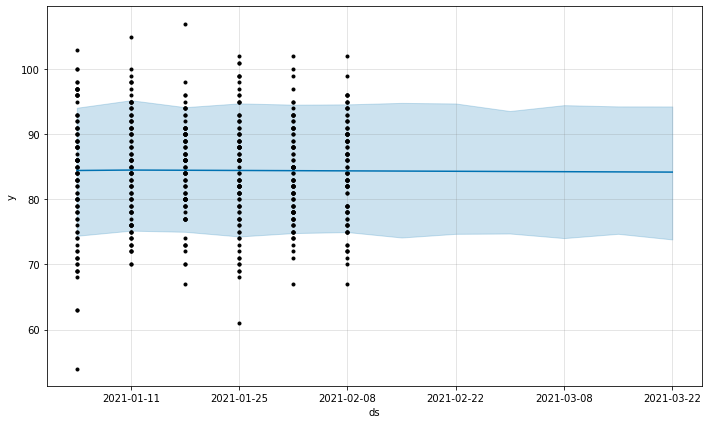

In [103]:
fig1 = model.plot(forecast)

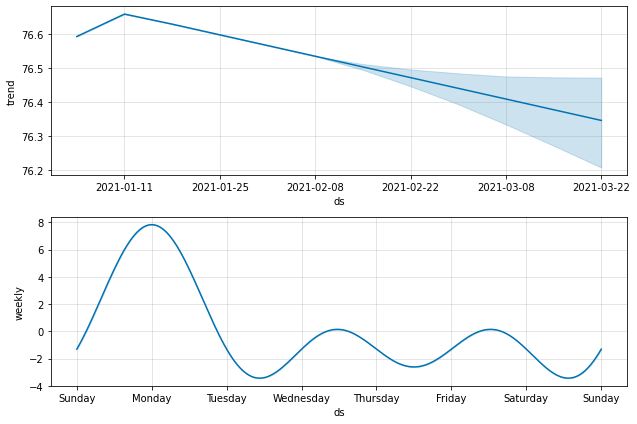

In [104]:
comp = model.plot_components(forecast)

In [105]:

results['error'] = results['y'] - results['yhat'] 
results['uncertainty'] = results['yhat_upper'] - results['yhat_lower']
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2021-01-04,74,84.435279,74.404193,94.078233,-10.435279,19.674040
2021-01-04,82,84.435279,74.404193,94.078233,-2.435279,19.674040
2021-01-04,75,84.435279,74.404193,94.078233,-9.435279,19.674040
2021-01-04,86,84.435279,74.404193,94.078233,1.564721,19.674040
2021-01-04,97,84.435279,74.404193,94.078233,12.564721,19.674040
...,...,...,...,...,...,...
2021-03-22,90,84.188020,73.840425,94.277364,5.811980,20.436939
2021-03-22,93,84.188020,73.840425,94.277364,8.811980,20.436939
2021-03-22,82,84.188020,73.840425,94.277364,-2.188020,20.436939


In [106]:
results[results['error'].abs()>1*results['uncertainty']]

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2021-01-04,63,84.435279,74.404193,94.078233,-21.435279,19.674040
2021-01-04,63,84.435279,74.404193,94.078233,-21.435279,19.674040
2021-01-04,54,84.435279,74.404193,94.078233,-30.435279,19.674040
2021-01-11,105,84.501367,75.191166,95.231371,20.498633,20.040205
2021-01-18,107,84.471737,75.013135,94.166458,22.528263,19.153324
2021-01-25,61,84.440214,74.298366,94.748317,-23.440214,20.449951
2021-02-15,63,84.345641,74.136516,94.824245,-21.345641,20.687729
2021-02-22,115,84.314117,74.700420,94.732664,30.685883,20.032244
2021-02-22,62,84.314117,74.700420,94.732664,-22.314117,20.032244


In [107]:
results['anomaly'] = results.apply(lambda x: 'Yes' if(np.abs(x['error'])>   x['uncertainty']) else 'No',axis=1)
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly
ds,,,,,,,
2021-01-04,74,84.435279,74.404193,94.078233,-10.435279,19.674040,No
2021-01-04,82,84.435279,74.404193,94.078233,-2.435279,19.674040,No
2021-01-04,75,84.435279,74.404193,94.078233,-9.435279,19.674040,No
2021-01-04,86,84.435279,74.404193,94.078233,1.564721,19.674040,No
2021-01-04,97,84.435279,74.404193,94.078233,12.564721,19.674040,No
...,...,...,...,...,...,...,...
2021-03-22,90,84.188020,73.840425,94.277364,5.811980,20.436939,No
2021-03-22,93,84.188020,73.840425,94.277364,8.811980,20.436939,No
2021-03-22,82,84.188020,73.840425,94.277364,-2.188020,20.436939,No


In [108]:
fig = px.scatter(results.reset_index(), x='ds', y='y', color='anomaly',labels={
                     "ds": "ds (weeks)",
                     "y": "y (views)"
                      },title='Agent Weekly Customer Views')
fig.show()

# Standard Deviation Approach

In [109]:
std_dev = results['y'].std()
print(std_dev)

mean = results['y'].mean()
print(mean)


threshold = mean + (3*std_dev)
results['anomaly2'] = results.apply(lambda x: 'Yes' if(x['y'] > threshold) else 'No',axis=1)
results


8.100841321024856
83.9075


,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly,anomaly2
ds,,,,,,,,
2021-01-04,74,84.435279,74.404193,94.078233,-10.435279,19.674040,No,No
2021-01-04,82,84.435279,74.404193,94.078233,-2.435279,19.674040,No,No
2021-01-04,75,84.435279,74.404193,94.078233,-9.435279,19.674040,No,No
2021-01-04,86,84.435279,74.404193,94.078233,1.564721,19.674040,No,No
2021-01-04,97,84.435279,74.404193,94.078233,12.564721,19.674040,No,No
...,...,...,...,...,...,...,...,...
2021-03-22,90,84.188020,73.840425,94.277364,5.811980,20.436939,No,No
2021-03-22,93,84.188020,73.840425,94.277364,8.811980,20.436939,No,No
2021-03-22,82,84.188020,73.840425,94.277364,-2.188020,20.436939,No,No


In [110]:
fig = px.scatter(results.reset_index(), x='ds', y='y', color='anomaly2',labels={
                     "ds": "ds (weeks)",
                     "y": "y (views)"
                      },title='Agent Weekly Customer Views')
fig.show()

# Model Refinement

**Prophet Model**


In [111]:
results['anomaly'] = results.apply(lambda x: 'Yes' if(np.abs(x['error'])> 1.485 *  x['uncertainty']) else 'No',axis=1)
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly,anomaly2
ds,,,,,,,,
2021-01-04,74,84.435279,74.404193,94.078233,-10.435279,19.674040,No,No
2021-01-04,82,84.435279,74.404193,94.078233,-2.435279,19.674040,No,No
2021-01-04,75,84.435279,74.404193,94.078233,-9.435279,19.674040,No,No
2021-01-04,86,84.435279,74.404193,94.078233,1.564721,19.674040,No,No
2021-01-04,97,84.435279,74.404193,94.078233,12.564721,19.674040,No,No
...,...,...,...,...,...,...,...,...
2021-03-22,90,84.188020,73.840425,94.277364,5.811980,20.436939,No,No
2021-03-22,93,84.188020,73.840425,94.277364,8.811980,20.436939,No,No
2021-03-22,82,84.188020,73.840425,94.277364,-2.188020,20.436939,No,No


In [112]:
fig = px.scatter(results.reset_index(), x='ds', y='y', color='anomaly',labels={"ds": "ds (weeks)","y": "y (views)"},title='Agent Weekly Customer Views')
fig.show()

**Standard Deviation Model**

In [113]:
std_dev = results['y'].std()
print(std_dev)

mean = results['y'].mean()
print(mean)


threshold = mean + (3.5*std_dev)
results['anomaly2'] = results.apply(lambda x: 'Yes' if(x['y'] > threshold) else 'No',axis=1)
results


8.100841321024856
83.9075


,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly,anomaly2
ds,,,,,,,,
2021-01-04,74,84.435279,74.404193,94.078233,-10.435279,19.674040,No,No
2021-01-04,82,84.435279,74.404193,94.078233,-2.435279,19.674040,No,No
2021-01-04,75,84.435279,74.404193,94.078233,-9.435279,19.674040,No,No
2021-01-04,86,84.435279,74.404193,94.078233,1.564721,19.674040,No,No
2021-01-04,97,84.435279,74.404193,94.078233,12.564721,19.674040,No,No
...,...,...,...,...,...,...,...,...
2021-03-22,90,84.188020,73.840425,94.277364,5.811980,20.436939,No,No
2021-03-22,93,84.188020,73.840425,94.277364,8.811980,20.436939,No,No
2021-03-22,82,84.188020,73.840425,94.277364,-2.188020,20.436939,No,No


In [114]:
fig = px.scatter(results.reset_index(), x='ds', y='y', color='anomaly2',labels={"ds": "ds (weeks)","y": "y (views)"},title='Agent Weekly Customer Views')
fig.show()